In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

In [2]:
pd.set_option('display.max_columns', None)

#### Lo primero que voy a hacer es cargar los dos data sets, el principal y el que contiene las odds (K1 y K2)

In [3]:
odds = pd.read_csv('../OnCourt/odds_atpII.csv', decimal=',', sep=';')

In [4]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,1.15,5.00
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,1.50,2.45
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,1.10,6.00
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,1.32,3.10


In [5]:
import glob

In [6]:
path =r'../tennis_atp-master/Prueba' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [7]:
# 1. Take out matchs from Davies Cup:
framesD = frame[frame['tourney_level'] != 'D']
# 2. Take out matchs from Challenge CUP:
framesDC = framesD[framesD['tourney_level'] != 'C']
# 3.1. Take out marchs'W/O' (Walk Over):
framesDCWO = framesDC[framesDC['score'] != 'W/O']
# 3.2. Take out marchs' W/O' (Walk Over):
framesDCWO = framesDCWO[framesDCWO['score'] != ' W/O']
# 4. Take out matchs with high volume of NaNs:
framesDCWO2 = framesDCWO.dropna(axis=0, thresh=30)

In [8]:
framesDCWO2.shape

(47085, 49)

In [9]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


#### Para crear nuevas features (%victoria ultimos partidos, % victoria head to head, etc) necesitaremos ordenar por fecha el dataset. Sinembargo esto no lo haremos hasta mas adelante

In [10]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

Vamos a hacer unas pruebas de filtrado:

In [11]:
partido = odds[(odds['ID1_NAME'] == 'Marat Safin') & (odds['ID2_NAME'] == 'Robin Vik')]

In [12]:
partido

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,1.15,5.0


In [13]:
framesDCWO2[framesDCWO2['tourney_date'] == 20060828]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2384,2006-560,US Open,Hard,128,G,20060828,1,103819,1.0,NaN,Roger Federer,R,185.0,SUI,25.054073,1.0,7295.0,104499,NaN,NaN,Jimmy Wang,R,178.0,TPE,21.549624,109.0,394.0,6-4 6-1 6-0,5,R128,99.0,7.0,1.0,64.0,39.0,35.0,11.0,11.0,0.0,1.0,3.0,6.0,104.0,50.0,27.0,20.0,12.0,10.0,18.0
2385,2006-560,US Open,Hard,128,G,20060828,2,102450,NaN,NaN,Tim Henman,R,185.0,GBR,31.975359,62.0,640.0,102257,NaN,NaN,Greg Rusedski,L,193.0,GBR,32.974675,136.0,310.0,7-6(4) 6-2 6-3,5,R128,114.0,8.0,1.0,85.0,55.0,41.0,21.0,15.0,0.0,1.0,6.0,5.0,92.0,56.0,37.0,17.0,14.0,2.0,6.0
2386,2006-560,US Open,Hard,128,G,20060828,3,102434,NaN,NaN,Vincent Spadea,R,183.0,USA,32.109514,84.0,490.0,104180,NaN,NaN,Gilles Muller,L,193.0,LUX,23.304586,91.0,443.0,6-2 6-4 6-3,5,R128,98.0,4.0,2.0,84.0,50.0,35.0,20.0,13.0,4.0,5.0,2.0,7.0,93.0,61.0,38.0,13.0,14.0,5.0,11.0
2387,2006-560,US Open,Hard,128,G,20060828,4,102035,29.0,NaN,Jonas Bjorkman,R,183.0,SWE,34.431211,35.0,953.0,104812,NaN,WC,Scoville Jenkins,R,188.0,USA,19.928816,277.0,137.0,7-5 6-4 6-4,5,R128,135.0,5.0,5.0,95.0,57.0,46.0,17.0,16.0,6.0,9.0,2.0,6.0,101.0,62.0,39.0,20.0,16.0,11.0,17.0
2388,2006-560,US Open,Hard,128,G,20060828,5,103292,21.0,NaN,Gaston Gaudio,R,175.0,ARG,27.718001,24.0,1175.0,104312,NaN,NaN,Andreas Seppi,R,190.0,ITA,22.516085,71.0,565.0,6-4 6-4 6-2,5,R128,106.0,7.0,2.0,82.0,47.0,37.0,21.0,14.0,4.0,5.0,8.0,6.0,88.0,49.0,32.0,18.0,14.0,2.0,7.0
2389,2006-560,US Open,Hard,128,G,20060828,6,105023,NaN,WC,Sam Querrey,R,198.0,USA,18.891170,174.0,238.0,104259,NaN,NaN,Philipp Kohlschreiber,R,178.0,GER,22.866530,63.0,619.0,6-3 6-4 6-4,5,R128,90.0,7.0,3.0,85.0,56.0,41.0,21.0,15.0,2.0,2.0,6.0,3.0,90.0,48.0,33.0,22.0,14.0,6.0,9.0
2390,2006-560,US Open,Hard,128,G,20060828,7,102967,NaN,NaN,Marc Gicquel,R,188.0,FRA,29.412731,79.0,504.0,103294,NaN,NaN,Christophe Rochus,R,170.0,BEL,27.701574,65.0,605.0,6-3 6-3 6-4,5,R128,94.0,21.0,1.0,80.0,49.0,39.0,16.0,14.0,1.0,3.0,1.0,5.0,89.0,49.0,32.0,17.0,14.0,2.0,8.0
2391,2006-560,US Open,Hard,128,G,20060828,8,103507,16.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,26.540726,18.0,1330.0,102567,NaN,Q,George Bastl,R,183.0,SUI,31.408624,142.0,291.0,7-5 6-4 3-6 6-3,5,R128,185.0,9.0,4.0,129.0,81.0,60.0,26.0,20.0,4.0,7.0,15.0,4.0,122.0,76.0,58.0,19.0,20.0,12.0,17.0
2392,2006-560,US Open,Hard,128,G,20060828,9,104607,12.0,NaN,Tomas Berdych,R,196.0,CZE,20.944559,14.0,1660.0,104081,NaN,NaN,Boris Pashanski,R,180.0,SRB,23.816564,87.0,456.0,6-4 6-2 6-1,5,R128,89.0,10.0,2.0,61.0,31.0,28.0,19.0,12.0,3.0,4.0,0.0,5.0,88.0,47.0,27.0,16.0,13.0,6.0,13.0
2393,2006-560,US Open,Hard,128,G,20060828,10,104252,NaN,NaN,Florian Mayer,R,190.0,GER,22.896646,58.0,675.0,102905,NaN,Q,Stefan Koubek,L,175.0,AUT,29.650924,123.0,358.0,6-4 6-1 6-1,5,R128,71.0,5.0,0.0,65.0,36.0,27.0,20.0,12.0,1.0,2.0,0.0,3.0,65.0,30.0,17.0,15.0,12.0,5.0,12.0


In [14]:
partido = odds[(odds['ID1_NAME'] == 'Marat Safin') & (odds['ID2_NAME'] == 'Robin Vik') & (odds['DATE'] == 20060828)]

In [15]:
partido

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,1.15,5.0


In [16]:
partido2 = framesDCWO2[(framesDCWO2['winner_name'] == 'Marat Safin') & (framesDCWO2['loser_name'] == 'Robin Vik') 
                       & (framesDCWO2['tourney_date'] == 20060828)]

In [17]:
partido2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2401,2006-560,US Open,Hard,128,G,20060828,18,103498,NaN,NaN,Marat Safin,R,193.0,RUS,26.584531,104.0,400.0,103503,NaN,NaN,Robin Vik,R,183.0,CZE,26.55989,85.0,487.0,6-1 6-1 3-6 6-3,5,R128,108.0,15.0,0.0,89.0,53.0,44.0,21.0,16.0,6.0,7.0,6.0,2.0,103.0,68.0,45.0,15.0,16.0,7.0,13.0


#### VOY A GENERAR LA KEY de la matriz odd

In [18]:
odds['OddKey'] = odds[['ID1_NAME', 'ID2_NAME']].apply(lambda x: ''.join(x), axis=1)

In [19]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2,OddKey
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,1.15,5.00,Marat SafinRobin Vik
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,1.50,2.45,Vince SpadeaGilles Muller
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,1.10,6.00,Dmitry TursunovIgor Kunitsyn
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN,Roger FedererJimmy Wang
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,1.32,3.10,Tim HenmanGreg Rusedski


In [20]:
odds['OddKey2'] = odds['DATE'].map(str) + odds['OddKey']

In [21]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2,OddKey,OddKey2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,1.15,5.00,Marat SafinRobin Vik,20060828Marat SafinRobin Vik
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,1.50,2.45,Vince SpadeaGilles Muller,20060828Vince SpadeaGilles Muller
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,1.10,6.00,Dmitry TursunovIgor Kunitsyn,20060828Dmitry TursunovIgor Kunitsyn
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN,Roger FedererJimmy Wang,20060828Roger FedererJimmy Wang
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,1.32,3.10,Tim HenmanGreg Rusedski,20060828Tim HenmanGreg Rusedski


#### AHORA VOY A GENERAR la Key de la matriz frame:

In [22]:
framesDCWO2['OddKey'] = framesDCWO2[['winner_name', 'loser_name']].apply(lambda x: ''.join(x), axis=1)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron


In [24]:
framesDCWO2['OddKey2'] = framesDCWO2['tourney_date'].map(str) + framesDCWO2['OddKey']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron


#### Ahora vamos a hacer un diccionario con OddKey2 y K1 y crear la columna K1 en nuestro  df para que que la rellene con los elementos que coincidan con la KEY

In [26]:
framesDCWO2["K1"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2,K1
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie,NaN
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit,NaN
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau,NaN
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob,NaN
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron,NaN


In [28]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [29]:
K1dict = dict(zip(odds.OddKey2, odds.K1))

In [30]:
framesDCWO2['K1'] = framesDCWO2['K1'].fillna(framesDCWO2['OddKey2'].map(K1dict))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [32]:
framesDCWO2["K2"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
K2dict = dict(zip(odds.OddKey2, odds.K2))

In [34]:
framesDCWO2['K2'] = framesDCWO2['K2'].fillna(framesDCWO2['OddKey2'].map(K2dict))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [36]:
framesDCWO2.shape

(47085, 53)

In [37]:
framesDCWO2.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2,K1,K2
1952,2005-533,Costa Do Sauipe,Clay,32,A,20050214,5,103428,3.0,NaN,Juan Ignacio Chela,R,190.0,ARG,25.462012,23.0,1245.0,102694,NaN,NaN,Lars Burgsmuller,R,183.0,GER,29.193703,91.0,461.0,6-4 6-0,3,R32,73.0,1.0,1.0,49.0,28.0,23.0,8.0,8.0,5.0,7.0,0.0,3.0,54.0,24.0,15.0,6.0,8.0,1.0,7.0,Juan Ignacio ChelaLars Burgsmuller,20050214Juan Ignacio ChelaLars Burgsmuller,1.129,6.900
1060,2008-341,Metz,Hard,32,A,20080929,16,103917,NaN,WC,Nicolas Mahut,R,190.0,FRA,26.688569,75.0,560.0,104468,2.0,NaN,Gilles Simon,R,183.0,FRA,23.756331,18.0,1390.0,6-4 3-6 6-1,3,R32,96.0,8.0,0.0,73.0,45.0,31.0,21.0,13.0,4.0,5.0,3.0,3.0,69.0,34.0,26.0,19.0,13.0,0.0,3.0,Nicolas MahutGilles Simon,20080929Nicolas MahutGilles Simon,3.560,1.362
58,2000-409,Atlanta,Clay,32,A,20000410,28,102776,8.0,NaN,Andrew Ilie,R,180.0,AUS,23.978097,79.0,535.0,102905,2.0,NaN,Stefan Koubek,L,175.0,AUT,23.268994,22.0,1114.0,7-6(3) 6-4,3,QF,93.0,5.0,5.0,84.0,40.0,32.0,25.0,11.0,4.0,5.0,6.0,6.0,86.0,57.0,39.0,10.0,11.0,4.0,6.0,Andrew IlieStefan Koubek,20000410Andrew IlieStefan Koubek,NaN,NaN
64,2009-500,Halle,Grass,32,A,20090608,3,104259,NaN,NaN,Philipp Kohlschreiber,R,178.0,GER,25.645448,24.0,1760.0,103451,NaN,NaN,Bjorn Phau,R,175.0,GER,29.678303,72.0,890.0,6-4 6-2,3,R32,64.0,6.0,4.0,60.0,39.0,34.0,9.0,9.0,3.0,3.0,4.0,2.0,45.0,24.0,17.0,11.0,9.0,1.0,4.0,Philipp KohlschreiberBjorn Phau,20090608Philipp KohlschreiberBjorn Phau,1.080,7.000
1016,2012-540,Wimbledon,Grass,128,G,20120625,14,104332,NaN,NaN,Philipp Petzschner,R,185.0,GER,28.254620,101.0,534.0,104882,NaN,NaN,Blaz Kavcic,R,188.0,SLO,25.308693,74.0,657.0,6-4 6-4 6-2,5,R128,103.0,14.0,0.0,76.0,59.0,49.0,11.0,14.0,3.0,3.0,8.0,1.0,90.0,61.0,40.0,14.0,14.0,4.0,8.0,Philipp PetzschnerBlaz Kavcic,20120625Philipp PetzschnerBlaz Kavcic,1.166,5.800


#### Ahora vamos a analizar variables:
#### a) Variables constantes:
    1. Hand
    2. Best of
#### b) Variables que constantes por diferencias:
1. Diferencia de edad
2. Diferencia de altura
3. Diferencia de rank
4. Diferencia de odds

#### c) Variables que cambian con el tiempo:
1. % victoria sobre tierra/cesped/etc
2. % victoria sobre torneos (Grand Slama/Open/etc...)
3. % minues per match
4. % Ret por temporada
5. % Aces
6. % df
7. %

#### d) Otras variables:
1. Victorias en los ultimos 5 partidos
2. % Victoria Head to Head
3. Victorias en los ultimos partidos Head to Head

#### Voy a hacer mi base line, para ello me voy a basar en los rank de atp y las odds de las casas de apuestas

In [38]:
framesDCWO2_bl = framesDCWO2[['tourney_date', 'winner_rank', 'loser_rank', 'K1', 'K2' ]]

In [39]:
framesDCWO2_bl.sample(10)

,tourney_date,winner_rank,loser_rank,K1,K2
74,20140319,7.0,90.0,NaN,NaN
1449,20000731,144.0,61.0,NaN,NaN
1066,20110410,12.0,93.0,NaN,NaN
659,20000619,77.0,125.0,NaN,NaN
1728,20100712,30.0,15.0,2.250,1.741
2662,20111120,6.0,7.0,NaN,NaN
1440,20060925,113.0,152.0,1.700,2.050
543,20080428,58.0,46.0,2.240,1.746
898,20120220,35.0,70.0,1.250,4.333
1653,20080114,37.0,124.0,1.426,3.150


In [40]:
framesDCWO2_bl.shape

(47085, 5)

Voy a crear la columna dif_rank y otra dif_k que es la que voy a utilizar para hacer el baseline. Voy a dividir el dataframe en 2 para poder dividir entre loser y winner aplicando la misma formula con el signo cambiado y utilizando una Y diferente (0 o 1)

In [41]:
framesDCWO2_bl = np.split(framesDCWO2_bl, [23542], axis = 0)

In [42]:
framesDCWO2_bl_w = framesDCWO2_bl[0]
framesDCWO2_bl_l = framesDCWO2_bl[1]

In [43]:
framesDCWO2_bl_w.head()

,tourney_date,winner_rank,loser_rank,K1,K2
0,20000501,113.0,50.0,NaN,NaN
1,20000501,352.0,139.0,NaN,NaN
2,20000501,103.0,133.0,NaN,NaN
3,20000501,107.0,95.0,NaN,NaN
4,20000501,74.0,111.0,NaN,NaN


In [44]:
framesDCWO2_bl_w.shape

(23542, 5)

In [45]:
framesDCWO2_bl_l.head()

,tourney_date,winner_rank,loser_rank,K1,K2
479,20080128,78.0,76.0,2.53,1.613
480,20080128,111.0,29.0,NaN,NaN
481,20080128,58.0,167.0,NaN,NaN
482,20080128,106.0,125.0,NaN,NaN
483,20080128,21.0,86.0,1.20,4.300


In [46]:
framesDCWO2_bl_l.shape

(23543, 5)

#### Para teminar vamos a crear la columna Y que en el caso de loser sera igual a 0 y en el caso de winner sera igual a 1

In [47]:
framesDCWO2_bl_w['Y']=1
framesDCWO2_bl_l['Y']=0

In [48]:
framesDCWO2_bl_l.sample(5)

,tourney_date,winner_rank,loser_rank,K1,K2,Y
1006,20140113,37.0,113.0,1.30,4.05,0
974,20080428,27.0,293.0,NaN,NaN,0
1236,20100815,13.0,46.0,NaN,NaN,0
1944,20160808,55.0,137.0,NaN,NaN,0
1136,20140224,21.0,56.0,1.65,2.35,0


In [49]:
framesDCWO2_bl_w.sample(5)

,tourney_date,winner_rank,loser_rank,K1,K2,Y
460,20000117,166.0,88.0,NaN,NaN,1
1011,20030929,130.0,110.0,NaN,NaN,1
2221,20011008,21.0,90.0,NaN,NaN,1
2184,20060213,60.0,88.0,1.3,3.3,1
1255,20070813,32.0,11.0,NaN,NaN,1


### Voy a quitar primero los NaN:

In [52]:
framesDCWO2_bl_l.isnull().sum()

tourney_date        0
winner_rank         8
loser_rank         53
K1              12836
K2              12836
Y                   0
dtype: int64

In [53]:
framesDCWO2_bl_w.isnull().sum()

tourney_date        0
winner_rank       595
loser_rank        635
K1              14353
K2              14353
Y                   0
dtype: int64

In [54]:
framesDCWO2_b2_w = framesDCWO2_bl_w.dropna(subset = ['winner_rank', 'loser_rank', 'K1', 'K2'])
framesDCWO2_b2_l = framesDCWO2_bl_l.dropna(subset = ['winner_rank', 'loser_rank', 'K1', 'K2'])

In [55]:
framesDCWO2_b2_w.shape

(9017, 6)

In [56]:
framesDCWO2_b2_l.shape

(10686, 6)

#### Ahora voy a crear la columna dif rank, que en el caso de los winner (Y=0) sera w - l y en el de los los loser (Y=0) sera l - w o - w + l

In [57]:
framesDCWO2_b2_w['dif_rank'] = framesDCWO2_b2_w['winner_rank'] - framesDCWO2_b2_w['loser_rank']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
framesDCWO2_b2_w['dif_k'] = framesDCWO2_b2_w['K1'] - framesDCWO2_b2_w['K2']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
framesDCWO2_b2_w.head()

,tourney_date,winner_rank,loser_rank,K1,K2,Y,dif_rank,dif_k
3,20040517,90.0,451.0,1.182,5.250,1,-361.0,-4.068
7,20040517,91.0,663.0,1.125,7.000,1,-572.0,-5.875
10,20040517,107.0,121.0,1.935,1.885,1,-14.0,0.050
11,20040517,82.0,432.0,3.270,1.382,1,-350.0,1.888
12,20040517,141.0,86.0,2.150,1.741,1,55.0,0.409


In [62]:
framesDCWO2_b2_l['dif_rank'] = - framesDCWO2_b2_l['winner_rank'] + framesDCWO2_b2_l['loser_rank']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
framesDCWO2_b2_l['dif_k'] = - framesDCWO2_b2_l['winner_rank'] + framesDCWO2_b2_l['loser_rank']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
framesDCWO2_b2_l.head()

,tourney_date,winner_rank,loser_rank,K1,K2,Y,dif_rank,dif_k
479,20080128,78.0,76.0,2.53,1.613,0,-2.0,-2.0
483,20080128,21.0,86.0,1.20,4.300,0,65.0,65.0
485,20080128,104.0,289.0,1.40,2.800,0,185.0,185.0
486,20080128,24.0,78.0,1.20,4.200,0,54.0,54.0
487,20080128,111.0,58.0,2.95,1.465,0,-53.0,-53.0


#### Vamos a quitar a continuacion los NaN

In [58]:
framesDCWO2_bl_w.isnull().sum()

tourney_date      0
winner_rank     595
loser_rank      635
Y                 0
dif_rank        649
dtype: int64

In [59]:
framesDCWO2_bl_l.isnull().sum()

tourney_date     0
winner_rank      8
loser_rank      53
Y                0
dif_rank        61
dtype: int64

In [61]:
framesDCWO2_b2_w = framesDCWO2_bl_w.dropna(subset = ['winner_rank', 'loser_rank', 'dif_rank'])

In [62]:
framesDCWO2_b2_l = framesDCWO2_bl_l.dropna(subset = ['winner_rank', 'loser_rank', 'dif_rank'])

In [64]:
x = framesDCWO2_b2_w.shape
y = framesDCWO2_b2_l.shape
print x
print y

(22893, 5)
(23482, 5)


In [65]:
framesDCWO2_b2_w.isnull().sum()

tourney_date    0
winner_rank     0
loser_rank      0
Y               0
dif_rank        0
dtype: int64

In [66]:
framesDCWO2_b2_l.isnull().sum()

tourney_date    0
winner_rank     0
loser_rank      0
Y               0
dif_rank        0
dtype: int64

#### Ahora vamos a unir los dos dataframes:

In [66]:
frames = [framesDCWO2_b2_w, framesDCWO2_b2_l] 
framesDCWO2_b2 = pd.concat(frames)

In [67]:
framesDCWO2_b2.shape

(19703, 8)

#### A continuacion vamos a estudir la normalidad de las variables

Lo primero que voy a hacer es una matriz que contenga solo variables numericas para el analisis:

In [77]:
framesDCWO2_b2_Float = framesDCWO2_b2[['winner_rank','loser_rank','dif_rank','K1','K2','dif_k']]

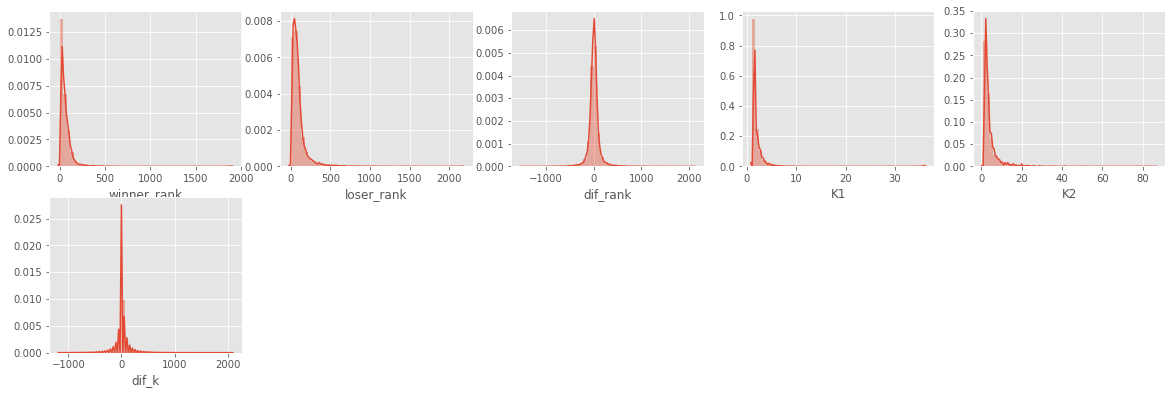

In [78]:
plt.figure(figsize=(20,20))
for index,col in enumerate(framesDCWO2_b2_Float.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(framesDCWO2_b2_Float[col])

In [72]:
framesDCWO2_b2_Float['dif_rank'].mean(),framesDCWO2_b2_Float['dif_rank'].median()

(8.845759529005734, 8.0)

In [74]:
framesDCWO2_b2_Float['dif_k'].mean(),framesDCWO2_b2_Float['dif_k'].median()

(24.571372279628225, 0.4309999950000001)

In [76]:
framesDCWO2_b2_Float.max(),framesDCWO2_b2_Float.min()

(winner_rank    1890.0
 loser_rank     2159.0
 dif_rank       2090.0
 dif_k          2090.0
 dtype: float64, winner_rank       1.0
 loser_rank        1.0
 dif_rank      -1515.0
 dif_k         -1182.0
 dtype: float64)

In [79]:
from scipy import stats

In [82]:
stats.trim_mean(framesDCWO2_b2_Float['dif_rank'], 0.01)

8.0127919622973742

In [83]:
stats.trim_mean(framesDCWO2_b2_Float['dif_k'], 0.01)

20.995015175592471

In [87]:
np.percentile(framesDCWO2_b2_Float['dif_rank'], 51)

9.0

In [94]:
np.percentile(framesDCWO2_b2_Float['dif_k'], 70)

24.0

La media y la mediana practicamente coninciden en rank. La mayor parte de los valores se situan entorno a la media (99%) pero existen algunos valores extremos. ¿Deberiamos quitar algunos de esos valores extremos o aportan informacion?
En las odds hay una diferencia sensible

#### Vamos a normalizar las variables

#### 1. Normalizamos la diferencia de rank

In [95]:
framesDCWO2_b2['winner_rank'].mean()

54.15205806222403

In [96]:
framesDCWO2_b2['loser_rank'].mean()

96.1472872151449

In [97]:
loser_rank_mean = framesDCWO2_b2['loser_rank'].mean()
loser_rank_std = framesDCWO2_b2['loser_rank'].std()
framesDCWO2_b2['loser_rank_N'] = framesDCWO2_b2['loser_rank'].apply(lambda x: (x - loser_rank_mean )/loser_rank_std)

In [98]:
winner_rank_mean = framesDCWO2_b2['winner_rank'].mean()
winner_rank_std = framesDCWO2_b2['winner_rank'].std()
framesDCWO2_b2['winner_rank_N'] = framesDCWO2_b2['winner_rank'].apply(lambda x: (x - winner_rank_mean )/winner_rank_std)

In [99]:
dif_rank_mean = framesDCWO2_b2['dif_rank'].mean()
dif_rank_std = framesDCWO2_b2['dif_rank'].std()
framesDCWO2_b2['dif_rank_N'] = framesDCWO2_b2['dif_rank'].apply(lambda x: (x - dif_rank_mean )/dif_rank_std)

In [100]:
framesDCWO2_b2.sample(10)

,tourney_date,winner_rank,loser_rank,K1,K2,Y,dif_rank,dif_k,loser_rank_N,winner_rank_N,dif_rank_N
793,20160321,43.0,80.0,1.650,2.410,0,37.0,37.000,-0.135642,-0.162302,0.206023
466,20140922,85.0,132.0,1.720,2.220,0,47.0,47.000,0.301174,0.448946,0.279200
942,20110620,15.0,51.0,1.580,2.520,0,36.0,36.000,-0.379252,-0.569800,0.198706
1073,20070101,25.0,31.0,1.645,2.450,1,-6.0,-0.805,-0.547258,-0.424265,-0.108636
639,20090727,43.0,165.0,1.650,2.100,0,122.0,122.000,0.578385,-0.162302,0.828025
1723,20050620,83.0,154.0,1.730,2.270,1,-71.0,-0.540,0.485981,0.419839,-0.584285
187,20041025,127.0,33.0,3.900,1.294,1,94.0,2.606,-0.530457,1.060194,0.623131
303,20050411,99.0,23.0,2.520,1.581,1,76.0,0.939,-0.614461,0.652695,0.491413
96,20160111,25.0,46.0,1.320,3.800,0,21.0,21.000,-0.421253,-0.424265,0.088941
653,20160307,11.0,42.0,1.345,3.560,0,31.0,31.000,-0.454855,-0.628014,0.162117


#### 2. Normalizamos la diferencia de odds

In [101]:
framesDCWO2_b2['K1'].mean()

1.7747907939055314

In [102]:
framesDCWO2_b2['K2'].mean()

4.089276960830692

In [103]:
loser_k_mean = framesDCWO2_b2['K2'].mean()
loser_k_std = framesDCWO2_b2['K2'].std()
framesDCWO2_b2['K2_N'] = framesDCWO2_b2['K2'].apply(lambda x: (x - loser_k_mean )/loser_k_std)

In [104]:
winner_k_mean = framesDCWO2_b2['K1'].mean()
winner_k_std = framesDCWO2_b2['K1'].std()
framesDCWO2_b2['K1_N'] = framesDCWO2_b2['K1'].apply(lambda x: (x - winner_k_mean )/winner_k_std)

In [105]:
dif_k_mean = framesDCWO2_b2['dif_k'].mean()
dif_k_std = framesDCWO2_b2['dif_k'].std()
framesDCWO2_b2['dif_k_N'] = framesDCWO2_b2['dif_k'].apply(lambda x: (x - dif_k_mean )/dif_k_std)

In [106]:
framesDCWO2_b2.sample(10)

,tourney_date,winner_rank,loser_rank,K1,K2,Y,dif_rank,dif_k,loser_rank_N,winner_rank_N,dif_rank_N,K2_N,K1_N,dif_k_N
2164,20130916,79.0,78.0,1.800,2.15,0,-1.0,-1.00,-0.152443,0.361625,-0.072048,-0.426072,0.023192,-0.252530
272,20041025,41.0,74.0,1.370,3.30,1,-33.0,-1.93,-0.186044,-0.191409,-0.306213,-0.173409,-0.372393,-0.261714
712,20160321,1.0,14.0,1.100,9.40,0,13.0,13.00,-0.690064,-0.773549,0.030399,1.166801,-0.620783,-0.114273
1773,20060220,94.0,130.0,1.350,3.00,1,-36.0,-1.65,0.284374,0.579928,-0.328166,-0.239321,-0.390792,-0.258949
2310,20120430,69.0,133.0,1.167,5.80,0,64.0,64.00,0.309575,0.216090,0.403600,0.375857,-0.559146,0.389378
279,20041025,11.0,112.0,1.050,15.50,1,-101.0,-14.45,0.133168,-0.628014,-0.803815,2.507012,-0.666782,-0.385356
1874,20071008,68.0,62.0,1.500,2.45,1,6.0,-0.95,-0.286848,0.201536,-0.020824,-0.360160,-0.252798,-0.252036
606,20140421,23.0,59.0,1.480,2.84,0,36.0,36.00,-0.312049,-0.453372,0.198706,-0.274475,-0.271197,0.112863
1795,20140707,59.0,119.0,1.100,8.20,0,60.0,60.00,0.191970,0.070555,0.374330,0.903153,-0.620783,0.349876
2201,20070115,7.0,10.0,1.320,3.10,1,-3.0,-1.78,-0.723665,-0.686228,-0.086683,-0.217351,-0.418391,-0.260233


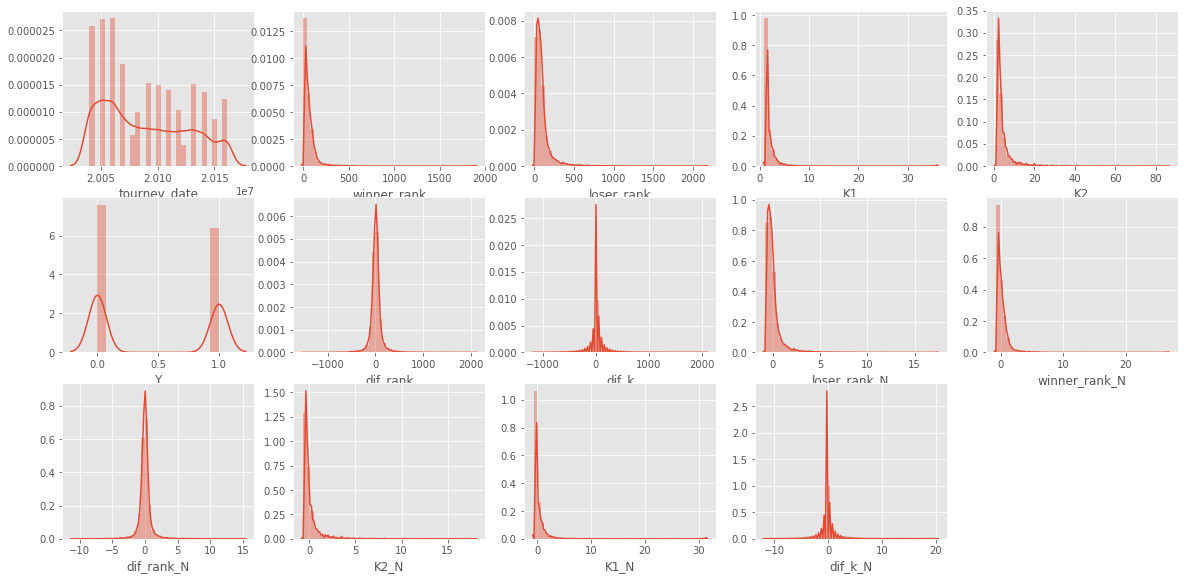

In [107]:
plt.figure(figsize=(20,20))
for index,col in enumerate(framesDCWO2_b2.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(framesDCWO2_b2[col])

In [108]:
framesDCWO2_b2.isnull().sum()

tourney_date     0
winner_rank      0
loser_rank       0
K1               0
K2               0
Y                0
dif_rank         0
dif_k            0
loser_rank_N     0
winner_rank_N    0
dif_rank_N       0
K2_N             0
K1_N             0
dif_k_N          0
dtype: int64

#### Una vez normalizadas voy a hacer un modelo sencillo para obtener mi accuracy inicial, basado simplemente en la diferencia de ranking atp. Evidentemente, el accuracy va a ser bajo, aunque debería superar el 50%, que es la probabilidad de que suceda uno de los dos posibles resultados aleatoriamente

In [109]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [158]:
#X_w = framesDCWO2_b2[['winner_rank_N', 'dif_rank_N']]
#X_w['Y'] = 1

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [159]:
#X_l = framesDCWO2_b2[['loser_rank_N', 'dif_rank_N']]
#X_l['Y'] = 0

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [110]:
framesDCWO2_b3 = framesDCWO2_b2[['Y','dif_rank_N','dif_k_N']]

In [111]:
framesDCWO2_b3.sample(5)

,Y,dif_rank_N,dif_k_N
80,0,-0.701368,-1.101824
1515,1,-1.513629,-0.310746
315,1,-0.050095,-0.253310
2304,0,1.830546,2.315101
656,1,-0.569650,-0.262406


In [163]:
#frame = [X_w, X_l]
#result = pd.concat(frame)

In [169]:
#result.sample(5)

,Y,dif_rank_N,loser_rank_N,winner_rank_N
2644,0,-0.297132,-0.119591,NaN
379,0,0.712319,-0.540095,NaN
837,0,-0.458952,0.180770,NaN
1554,1,-0.281720,NaN,-0.240114
200,0,0.712319,-0.351297,NaN


In [170]:
#result['loser_rank_N']=result['loser_rank_N'].fillna(0)
#result['winner_rank_N']=result['winner_rank_N'].fillna(0)

In [174]:
#result.sample(5)

,Y,dif_rank_N,loser_rank_N,winner_rank_N
2195,1,0.203741,0.0,-0.075421
2102,1,0.142095,0.0,-0.445980
1388,1,0.319327,0.0,-0.322460
843,1,0.319327,0.0,0.528453
797,1,-2.393091,0.0,-0.624397


In [175]:
#result.shape

(92750, 4)

In [183]:
#X.shape

(92750, 3)

In [185]:
#Y.shape

(92750, 1)

In [112]:
X = framesDCWO2_b3[['dif_rank_N','dif_k_N']]

In [113]:
y = framesDCWO2_b3[['Y']]

In [114]:
logreg = linear_model.LogisticRegression()

In [115]:
logreg.fit(X, y)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
logreg.score(X, y, sample_weight=None)

0.69603613662893971

#### Como habiamos predecido, nuestro baseline es practicamente igual a la probabilidad aleatoria ya que la posicion en el rank no aporta mucha informacion al modelo, especialmente cuando los rank sean mas cercanos entre si. 
#### El resultado mejora el obtenido con una sola feature

In [144]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0
0,dif_rank_N,-0.975781
1,dif_k_N,-0.376828


In [145]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     995.7
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:41:50   Log-Likelihood:                -13281.
No. Observations:               19703   AIC:                         2.657e+04
Df Residuals:                   19700   BIC:                         2.659e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4576      0.003    135.291      0.0

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [146]:
#### COMENTAR EL RESUTADO

#### Ahora vamos a probar con un KNeigbours:

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [147]:
neigh = KNeighborsClassifier(n_neighbors = 5)

In [148]:
neigh.fit(X, y)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [122]:
(neigh.predict([[0.5, -0.3]]))

array([1])

In [123]:
(neigh.predict([[-0.5 , -0.3]]))

array([1])

#### Las predicciones funcionan, el rank medio del ganador es 54 frente a 96 del perdedor, por tanto la tendencia es dar como ganador al que tenga el rank mas bajo.

In [124]:
from sklearn.cross_validation import train_test_split

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [126]:
len(X_train)

14777

In [127]:
len(y_test)

4926

In [149]:
clf = KNeighborsClassifier(n_neighbors=5)

In [150]:
clf.fit(X_train, y_train)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(clf.predict(X_test), y_test)

0.99593991067803489

In [153]:
accuracy_score(clf.predict(X_train), y_train)

0.99756378155241254

In [165]:
#### REVISAR. Hay algo en el modelo que no funciona.

#### Vamos a hacer la representacion grafica:

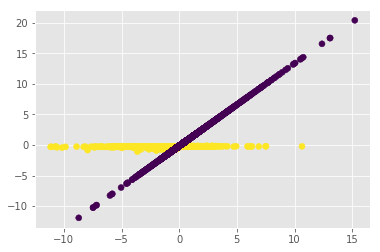

In [163]:
plt.scatter(framesDCWO2_b3['dif_rank_N'], framesDCWO2_b3['dif_k_N'], c=framesDCWO2_b3['Y'])
plt.show()

In [166]:
### Revisar el grafico. Esta representación se debe a la normalización?

#### El eje de las y represnta dif_k mientras que el de las x representa dif_rank. Por tanto, la linea de color amarillo representa dif_rank mientras que la morada es dif_k

#### Vamos a completar el analisis del resultado: Vamos a mostrar la matriz de confusion y a mostrar el indice de
#### Precision = True Positives / Total positives identified
#### Recall = True positives / Total positives

¿Como podemos saber cual es el numero óptimo de k?

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
mat = confusion_matrix(y_test,clf.predict(X_test))
dfmat = pd.DataFrame(mat,index = ["Win","Lose"],
                  columns = ["Win","Lose"])

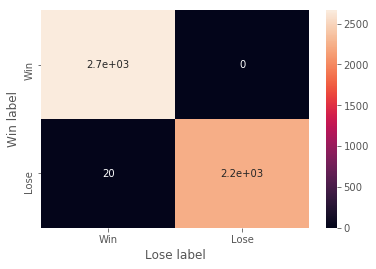

In [135]:
sns.heatmap(dfmat,annot=True)
plt.ylabel('Win label')
plt.xlabel('Lose label')

In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ["Win","Lose"]
print precision_score(y_test,clf.predict(X_test),average=None)
print recall_score(y_test,clf.predict(X_test),average=None)
print f1_score(y_test,clf.predict(X_test),average=None)

['Win', 'Lose']
[ 0.99254566  1.        ]
[ 1.          0.99116217]
[ 0.99625889  0.99556147]


#### El accuracy de kneighbours es ligeramente inferior al obtenido en la regresion
#### Evidentemente el accuracy en el set de train es ligeramente superior al de test

¿Como podemos saber cual es el numero óptimo de k?

In [137]:
scores=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    scores.append(accuracy_score(clf.predict(X_test), y_test))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


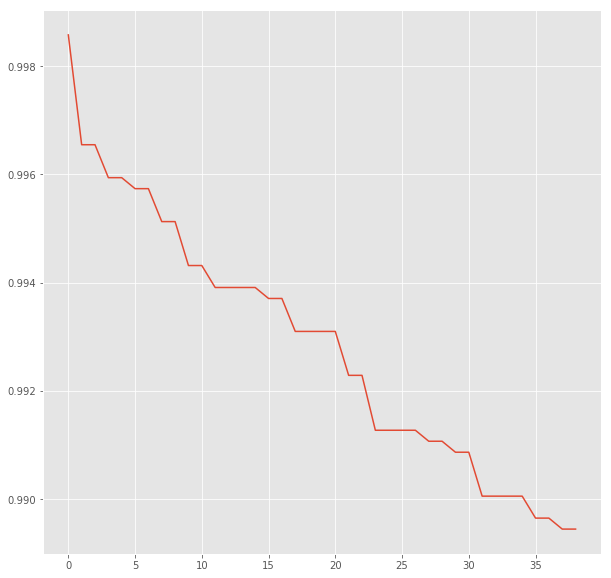

In [138]:
plt.figure(figsize=(10,10))
plt.plot(scores)
plt.show()

#### Parece que el mejor resultado nos lo daría con unos 20 vecinos, auque el indice de variacion es pequeño y probablemente con un numero de k tan elevado se produzca overfiting.

Me falta hacer un cross val score para poder tener resultados medios de varias particiones

In [154]:
#### ¿Porque no funciona cross val score??

In [160]:
X_train.head()

,dif_rank_N
2217,0.384997
408,-0.599988
114,0.108902
2366,-0.234350
1401,0.123826


In [161]:
X_train.shape

(34781, 1)

In [162]:
y_train.head()

,Y
2217,0
408,1
114,0
2366,1
1401,1


In [163]:
y_train.shape

(34781, 1)

In [170]:
cv_scores=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf,X_train, y_train, cv=10, scoring='accuracy_score')
    cv_scores.append(scores.mean())

IndexError: too many indices for array

#### Practicamente el baseline esta terminado. Quedan algunos puntos abiertos:
1. Revisar el Kmeans: ni el accuracy ni el grafico tienen sentido
2. Error en cross val score: "to many indices for array"